In [1]:
import os
os.chdir('/home/rn7823/fl_lab/centralized_cifar_10')
os.getcwd()

'/home/rn7823/fl_lab/centralized_cifar_10'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('artifacts/cnn_2024-09-07-02-03_19200225.csv')
df

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.301806,0.002292,16.09,0.337608
1,2,2.283276,0.002283,10.00,0.341788
2,3,2.303868,0.002265,10.33,0.630486
3,4,2.252051,0.002252,14.96,0.369939
4,5,2.242561,0.002230,18.82,0.543078
...,...,...,...,...,...
3905,3906,0.334961,0.001045,70.37,3.922736
3906,3907,0.288692,0.001033,70.56,3.409690
3907,3908,0.251597,0.001036,70.29,2.988136
3908,3909,0.209012,0.001062,69.88,2.099792


In [4]:
df_sampled = df[df.index % 100 == 0]

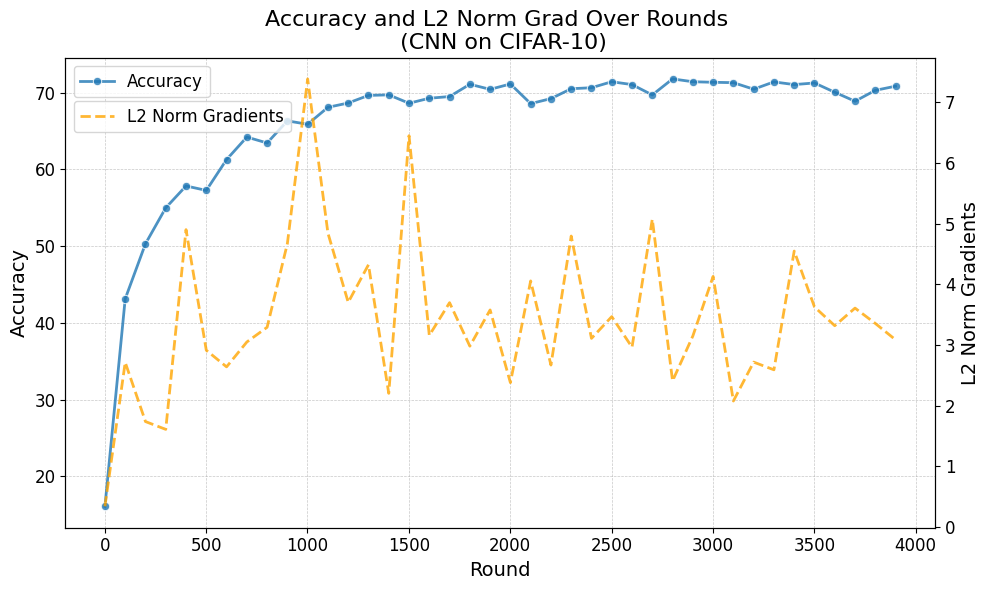

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for the first y-axis
sns.lineplot(data=df_sampled,
             x='Round',
             y='accuracies',
             ax=ax1,                   # Use the first axis
             linewidth=2,             # Line width
             marker='o',              # Marker style
             markersize=6,            # Marker size
             linestyle='-',           # Line style
             alpha=0.8,
             label='Accuracy')        # Add label for legend

# Configure the first y-axis
ax1.set_title('Accuracy and L2 Norm Grad Over Rounds \n (CNN on CIFAR-10)', fontsize=16)    # Title with font size
ax1.set_xlabel('Round', fontsize=14)                                      # X-axis label with font size
ax1.set_ylabel('Accuracy', fontsize=14)                                   # Y-axis label with font size
ax1.tick_params(axis='both', which='major', labelsize=12)                 # Improve tick appearance
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)   # Add gridlines

# Add legend for the first y-axis
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0), fontsize=12, frameon=True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot data for the second y-axis
sns.lineplot(data=df_sampled,
             x='Round',
             y='gradients',  # Replace with the actual column name for the second y-axis
             ax=ax2,             # Use the second axis
             color='orange',     # Line color for the second y-axis
             linewidth=2,        # Line width
             linestyle='--',     # Line style
             alpha=0.8,
             label='L2 Norm Gradients')  # Add label for legend

# Configure the second y-axis
ax2.set_ylabel('L2 Norm Gradients', fontsize=14)  # Y-axis label for the second axis
ax2.tick_params(axis='y', which='major', labelsize=12)  # Improve tick appearance

# Add legend for the second y-axis (L2 Norm Gradients)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.925), fontsize=12, frameon=True)


# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
